# Elijah Sartin and Richard Osborn
## DS160 Final Project Data Set
### Version 0.0.1

In [455]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline

#Linear Regression (for comparison)
from sklearn.linear_model import LinearRegression

#Support Vector Machine
from sklearn import svm

#Provides a way to split the data into train and test data sets.
from sklearn.model_selection import train_test_split 

#Provides a way to calculate metrics on the model
from sklearn.metrics import accuracy_score, confusion_matrix, classification_report
#from sklearn.metrics import roc_curve,  roc_auc_score

from sklearn.linear_model import LogisticRegression
from sklearn.metrics import classification_report, confusion_matrix

In [456]:
df=pd.read_csv('bank-additional.csv',sep=';')

In [457]:
print(df.shape)

(4119, 21)


In [458]:
df.sample(5)

,age,job,marital,education,default,housing,loan,contact,month,day_of_week,...,campaign,pdays,previous,poutcome,emp.var.rate,cons.price.idx,cons.conf.idx,euribor3m,nr.employed,y
2034,47,technician,married,basic.9y,no,no,no,telephone,jun,fri,...,1,999,0,nonexistent,1.4,94.465,-41.8,4.967,5228.1,no
1163,63,technician,married,unknown,no,yes,no,cellular,aug,tue,...,1,999,0,nonexistent,-2.9,92.201,-31.4,0.838,5076.2,no
710,28,blue-collar,married,basic.4y,no,no,no,cellular,may,tue,...,1,999,0,nonexistent,-1.8,92.893,-46.2,1.291,5099.1,no
1947,31,blue-collar,single,basic.9y,no,yes,no,telephone,may,tue,...,1,999,0,nonexistent,1.1,93.994,-36.4,4.856,5191.0,no
1827,60,admin.,married,basic.9y,no,yes,no,cellular,aug,thu,...,1,999,0,nonexistent,1.4,93.444,-36.1,4.962,5228.1,no


In [459]:
df.dtypes

age                 int64
job                object
marital            object
education          object
default            object
housing            object
loan               object
contact            object
month              object
day_of_week        object
duration            int64
campaign            int64
pdays               int64
previous            int64
poutcome           object
emp.var.rate      float64
cons.price.idx    float64
cons.conf.idx     float64
euribor3m         float64
nr.employed       float64
y                  object
dtype: object

In [460]:
df.columns#need to change cons.price.idx

Index(['age', 'job', 'marital', 'education', 'default', 'housing', 'loan',
       'contact', 'month', 'day_of_week', 'duration', 'campaign', 'pdays',
       'previous', 'poutcome', 'emp.var.rate', 'cons.price.idx',
       'cons.conf.idx', 'euribor3m', 'nr.employed', 'y'],
      dtype='object')

We are dropping columns that we were not going to be using for testing, this will allow our data to proccess faster and clean the data.

In [461]:

#pdays,poutcome,emp.var.ratecons.conf.idx, euribor3m, nr.employed

In [462]:
df = df.dropna()

In [463]:
df.rename(columns={"cons.price.idx":"cpi"},inplace=True)


In [464]:
df.columns

Index(['age', 'job', 'marital', 'education', 'default', 'housing', 'loan',
       'contact', 'month', 'day_of_week', 'duration', 'campaign', 'pdays',
       'previous', 'poutcome', 'emp.var.rate', 'cpi', 'cons.conf.idx',
       'euribor3m', 'nr.employed', 'y'],
      dtype='object')

In [465]:
print(df.shape)

(4119, 21)


In [466]:
age=df.age.groupby(df.age).count()

Text(0, 0.5, 'Number of Clients')

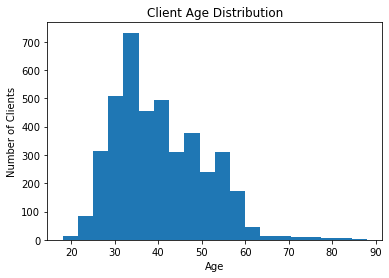

In [467]:
plt.hist(df.age,bins=20) #Kinda normal     usable?
plt.title('Client Age Distribution')
plt.xlabel('Age')
plt.ylabel('Number of Clients')

In [468]:
duration=df.duration.groupby(df.duration).count()
#Remove on the basis that its obvious the longer the duration, the more likely you are to subscribe

Text(0, 0.5, 'Number of Clients')

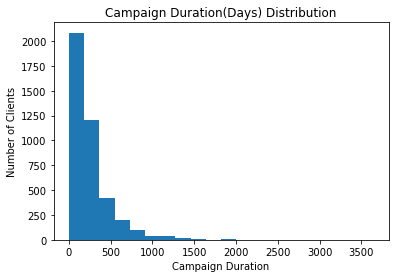

In [469]:
plt.hist(df.duration,bins=20) #skewed, maybe bound ?
plt.title('Campaign Duration(Days) Distribution')
plt.xlabel('Campaign Duration')
plt.ylabel('Number of Clients')

In [470]:
campaign=df.campaign.groupby(df.campaign).count()

Text(0, 0.5, 'Number of Clients')

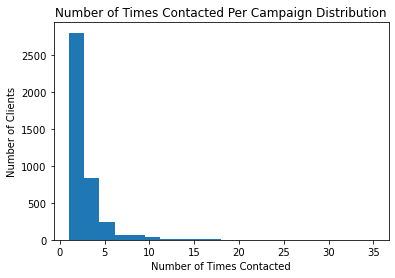

In [471]:
plt.hist(df.campaign,bins=20) #skewed, maybe bound?
plt.title('Number of Times Contacted Per Campaign Distribution')
plt.xlabel('Number of Times Contacted')
plt.ylabel('Number of Clients')

In [472]:
job=df.job.groupby(df.job).count()

<BarContainer object of 12 artists>

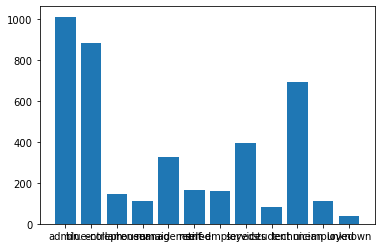

In [473]:
plt.bar(job.index,job.values) #maybe landscape

In [474]:
marital=df.marital.groupby(df.marital).count()

<BarContainer object of 4 artists>

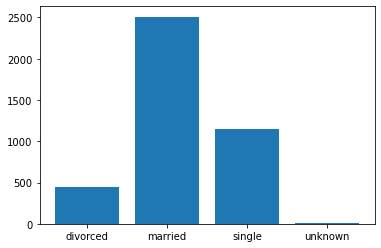

In [475]:
plt.bar(marital.index,marital.values)

In [476]:
education=df.education.groupby(df.education).count()

<BarContainer object of 8 artists>

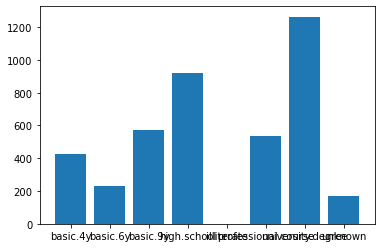

In [477]:
plt.bar(education.index,education.values)# maybe landscape

In [478]:
default=df.default.groupby(df.default).count()
default#Remove from data

default
no         3315
unknown     803
yes           1
Name: default, dtype: int64

<BarContainer object of 3 artists>

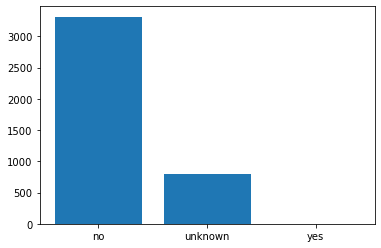

In [479]:
plt.bar(default.index,default.values)

In [480]:
housing=df.housing.groupby(df.housing).count()
housing

housing
no         1839
unknown     105
yes        2175
Name: housing, dtype: int64

<BarContainer object of 3 artists>

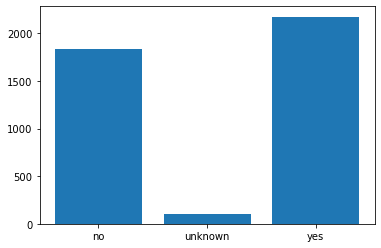

In [481]:
plt.bar(housing.index,housing.values)

In [482]:
loan=df.loan.groupby(df.loan).count()

<BarContainer object of 3 artists>

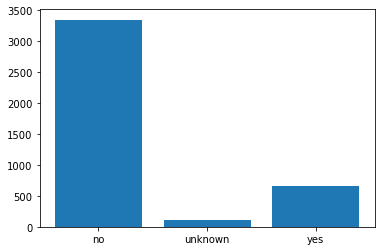

In [483]:
plt.bar(loan.index,loan.values)

In [484]:
contact=df.contact.groupby(df.contact).count()

<BarContainer object of 2 artists>

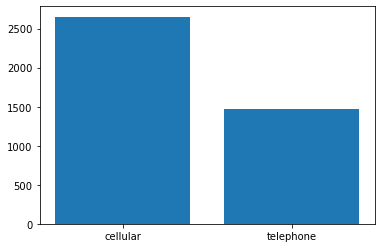

In [485]:
plt.bar(contact.index,contact.values)

In [486]:
month=df.month.groupby(df.month).count()

<BarContainer object of 10 artists>

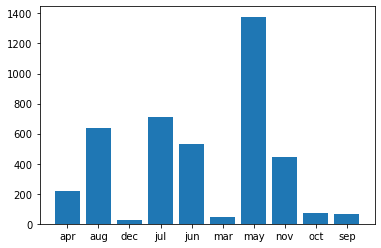

In [487]:
plt.bar(month.index,month.values)

In [488]:
day_of_week=df.day_of_week.groupby(df.day_of_week).count()
day_of_week#

day_of_week
fri    768
mon    855
thu    860
tue    841
wed    795
Name: day_of_week, dtype: int64

<BarContainer object of 5 artists>

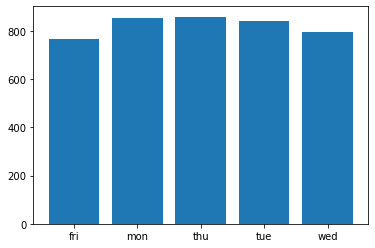

In [489]:
plt.bar(day_of_week.index,day_of_week.values)#lazy friday

In [490]:
y=df.y.groupby(df.y).count() #IMPORTANT

Text(0, 0.5, 'Number of Clients')

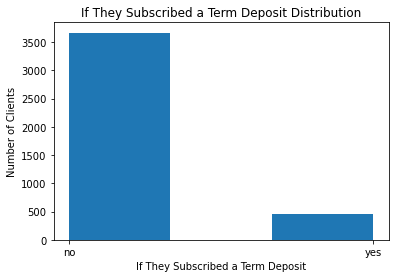

In [491]:
plt.hist(df.y,bins=3)
plt.title('If They Subscribed a Term Deposit Distribution')
plt.xlabel('If They Subscribed a Term Deposit')
plt.ylabel('Number of Clients')

In [492]:
previous=df.y.groupby(df.previous).count()

Text(0, 0.5, 'Number of Clients')

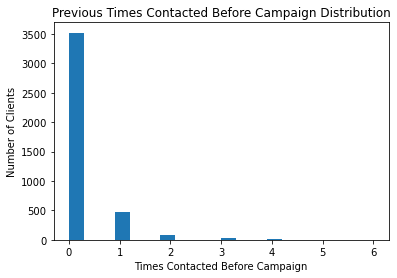

In [493]:
plt.hist(df.previous,bins=20)
plt.title('Previous Times Contacted Before Campaign Distribution')
plt.xlabel('Times Contacted Before Campaign')
plt.ylabel('Number of Clients')

In [494]:
cpi=df.cpi.groupby(df.cpi).count()

Text(0, 0.5, 'Number of Clients')

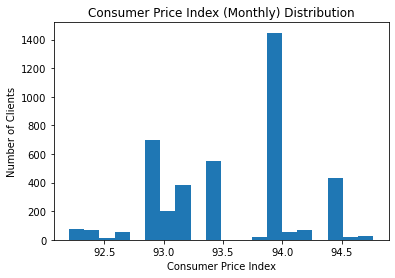

In [495]:
#Compares prices to inflation. 100 means that they experienced no inflation compared to the base year(can't find).
#Less than 100 implies that the inflation was negative, increasing the value of the consumers dollar's. 
#They are all different because people pay and make different incomes.
plt.hist(df.cpi,bins=20) 
plt.title('Consumer Price Index (Monthly) Distribution')
plt.xlabel('Consumer Price Index')
plt.ylabel('Number of Clients')

In [496]:
default #1 default lmao, why and who?

default
no         3315
unknown     803
yes           1
Name: default, dtype: int64

In [497]:
cpi #92.201-94.767

cpi
92.201     75
92.379     25
92.431     43
92.469     14
92.649     36
92.713     21
92.756      1
92.843     25
92.893    597
92.963     75
93.075    201
93.200    386
93.369     23
93.444    528
93.749     14
93.798      6
93.876     23
93.918    667
93.994    758
94.027     33
94.055     24
94.199     39
94.215     30
94.465    431
94.601     20
94.767     24
Name: cpi, dtype: int64

In [498]:
 campaign #1-35

campaign
1     1764
2     1039
3      549
4      291
5      142
6       99
7       60
8       36
9       32
10      20
11      19
12      16
13      11
14       6
15       2
16       7
17      14
18       1
19       2
22       2
23       2
24       1
27       1
29       2
35       1
Name: campaign, dtype: int64

In [499]:
duration #0-2000

duration
0       1
4       1
5       4
6       5
7       4
       ..
1980    1
2301    1
2653    1
3253    1
3643    1
Name: duration, Length: 828, dtype: int64

In [500]:
df.describe()

,age,duration,campaign,pdays,previous,emp.var.rate,cpi,cons.conf.idx,euribor3m,nr.employed
count,4119.000000,4119.000000,4119.000000,4119.000000,4119.000000,4119.000000,4119.000000,4119.000000,4119.000000,4119.000000
mean,40.113620,256.788055,2.537266,960.422190,0.190337,0.084972,93.579704,-40.499102,3.621356,5166.481695
std,10.313362,254.703736,2.568159,191.922786,0.541788,1.563114,0.579349,4.594578,1.733591,73.667904
min,18.000000,0.000000,1.000000,0.000000,0.000000,-3.400000,92.201000,-50.800000,0.635000,4963.600000
25%,32.000000,103.000000,1.000000,999.000000,0.000000,-1.800000,93.075000,-42.700000,1.334000,5099.100000
50%,38.000000,181.000000,2.000000,999.000000,0.000000,1.100000,93.749000,-41.800000,4.857000,5191.000000
75%,47.000000,317.000000,3.000000,999.000000,0.000000,1.400000,93.994000,-36.400000,4.961000,5228.100000
max,88.000000,3643.000000,35.000000,999.000000,6.000000,1.400000,94.767000,-26.900000,5.045000,5228.100000


In [501]:
cor=df.corr()

<AxesSubplot:>

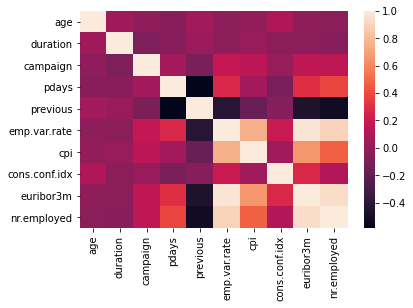

In [502]:
sns.heatmap(cor) #lmao no correlation??

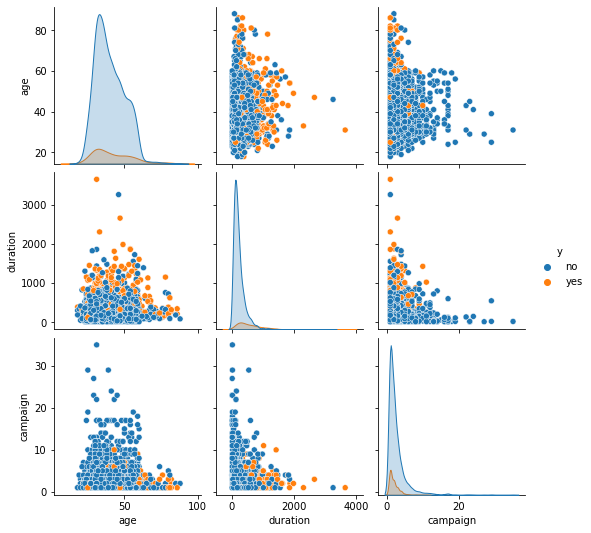

In [503]:
sns.pairplot(df[['age','duration','campaign','y']], hue='y') #comparisons

In [504]:
 df.drop(df.columns[[0, 7, 8, 9, 10, 11, 12, 13, 15, 16, 17, 18, 19]], 
   axis = 1, inplace = True)

In [505]:
df

,job,marital,education,default,housing,loan,poutcome,y
0,blue-collar,married,basic.9y,no,yes,no,nonexistent,no
1,services,single,high.school,no,no,no,nonexistent,no
2,services,married,high.school,no,yes,no,nonexistent,no
3,services,married,basic.9y,no,unknown,unknown,nonexistent,no
4,admin.,married,university.degree,no,yes,no,nonexistent,no
...,...,...,...,...,...,...,...,...
4114,admin.,married,basic.6y,no,yes,yes,nonexistent,no
4115,admin.,married,high.school,no,yes,no,nonexistent,no
4116,student,single,high.school,no,no,no,failure,no
4117,admin.,married,high.school,no,no,no,nonexistent,no


In [506]:
data = pd.get_dummies(df, columns =['job', 'education', 'default','housing','loan'])

In [507]:
data

,marital,poutcome,y,job_admin.,job_blue-collar,job_entrepreneur,job_housemaid,job_management,job_retired,job_self-employed,...,education_unknown,default_no,default_unknown,default_yes,housing_no,housing_unknown,housing_yes,loan_no,loan_unknown,loan_yes
0,married,nonexistent,no,0,1,0,0,0,0,0,...,0,1,0,0,0,0,1,1,0,0
1,single,nonexistent,no,0,0,0,0,0,0,0,...,0,1,0,0,1,0,0,1,0,0
2,married,nonexistent,no,0,0,0,0,0,0,0,...,0,1,0,0,0,0,1,1,0,0
3,married,nonexistent,no,0,0,0,0,0,0,0,...,0,1,0,0,0,1,0,0,1,0
4,married,nonexistent,no,1,0,0,0,0,0,0,...,0,1,0,0,0,0,1,1,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
4114,married,nonexistent,no,1,0,0,0,0,0,0,...,0,1,0,0,0,0,1,0,0,1
4115,married,nonexistent,no,1,0,0,0,0,0,0,...,0,1,0,0,0,0,1,1,0,0
4116,single,failure,no,0,0,0,0,0,0,0,...,0,1,0,0,1,0,0,1,0,0
4117,married,nonexistent,no,1,0,0,0,0,0,0,...,0,1,0,0,1,0,0,1,0,0


In [508]:
cm=confusion_matrix(y_pred,Y_test)

In [509]:
cm

array([[631,   0],
       [  0, 193]])

Text(0.5, 15.0, 'Predicted Label')

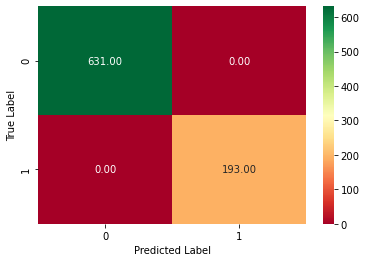

In [510]:
heatmap=sns.heatmap(cm,annot=True,fmt='.2f', cmap= 'RdYlGn')
plt.ylabel('True Label')
plt.xlabel('Predicted Label')

In [513]:
y = data['y']
y.replace('yes',1,inplace=True)
y.replace('no',0,inplace=True)
y = np.array(y)

In [514]:
df.y.groupby(df.y).count()

y
no     3668
yes     451
Name: y, dtype: int64

In [515]:
df.head()

,job,marital,education,default,housing,loan,poutcome,y
0,blue-collar,married,basic.9y,no,yes,no,nonexistent,no
1,services,single,high.school,no,no,no,nonexistent,no
2,services,married,high.school,no,yes,no,nonexistent,no
3,services,married,basic.9y,no,unknown,unknown,nonexistent,no
4,admin.,married,university.degree,no,yes,no,nonexistent,no


In [516]:
dataset2 = pd.get_dummies(df, columns = ['job'])
dataset2 = pd.get_dummies(dataset2, columns = ['education'])
dataset2['housing'] = dataset2['housing'].map({'yes': 1, 'no': 0})
dataset2['default'] = dataset2['default'].map({'yes': 1, 'no': 0})
dataset2['loan'] = dataset2['loan'].map({'yes': 1, 'no': 0})
dataset_response = pd.DataFrame(df['y'])
dataset2 = pd.merge(dataset2, dataset_response, left_index = True, right_index = True)